In [1]:
#import xgcm
import xmitgcm
import xrft
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from dask.utils import SerializableLock
from dask.distributed import Client
client = Client(scheduler_file='../schedule_file')
client

<Client: scheduler='tcp://10.43.4.162:8786' processes=1 cores=48>

In [3]:
ddir = '/rigel/ocp/users/ra2697/channel_topography/GCM/run_taux2000_rb0110_bump'
ds = xmitgcm.open_mdsdataset(ddir, prefix=['U', 'Eta', 'T', 'V', 'S', 'W'])#, prefix=['Diag_ThPhUVW'], iters=iters)
ds

/rigel/home/ra2697/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.Dataset>
Dimensions:              (XC: 400, XG: 400, YC: 400, YG: 400, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 118)
Coordinates:
    iter                 (time) int64 8294400 8294976 8295552 8296128 ...
  * time                 (time) int64 8294400 8294976 8295552 8296128 ...
  * XG                   (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 ...
  * XC                   (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 ...
  * YG                   (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 ...
  * YC                   (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 ...
  * Zu                   (Zu) float32 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
  * Zp1                  (Zp1) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 ...
  * Z                    (Z) float32 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 ...
  * Zl                   (Zl) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 ...
    rAs                  (Y

In [4]:
ds.nbytes / 1e9

15.262090084

In [5]:
w_sq_profile = ds.W.mean(dim=('time', 'YC', 'XC'))
w_sq_profile

<xarray.DataArray 'W' (Zl: 40)>
dask.array<mean_ag..., shape=(40,), dtype=float32, chunksize=(40,)>
Coordinates:
  * Zl       (Zl) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...

In [6]:
%time w_sq_profile.load()

CPU times: user 50 ms, sys: 2.8 ms, total: 52.8 ms
Wall time: 8.84 s


<xarray.DataArray 'W' (Zl: 40)>
array([ -9.080495e-18,  -1.479856e-16,  -8.089879e-15,   1.065496e-14,
        -5.031510e-15,   2.972044e-15,   2.959712e-16,  -1.127157e-14,
        -4.340910e-15,  -1.414495e-14,  -2.984376e-15,   1.316455e-14,
         2.096462e-15,  -3.206354e-16,  -4.143596e-15,   7.756911e-15,
        -6.190730e-15,   5.333647e-15,  -4.994513e-15,   5.796102e-15,
         6.264723e-15,   2.959712e-16,   9.643727e-15,  -1.281925e-14,
         1.666688e-14,   8.200867e-15,  -1.699368e-14,  -1.208549e-15,
         1.361467e-14,   3.872289e-15,  -1.684569e-14,   4.575221e-15,
         3.063301e-14,  -2.648325e-14,  -3.625647e-15,  -1.991639e-14,
        -8.083712e-15,  -1.331870e-15,   6.095156e-15,  -4.587553e-15], dtype=float32)
Coordinates:
  * Zl       (Zl) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...

In [12]:
v_fft = xrft.dft(ds.V, dim=['XC'], shift=False)
pow_spec = (v_fft*v_fft.conj()).isel(freq_XC=slice(0,len(ds.XC)//2)).mean(dim=('YG','time')).astype('f8')
pow_spec

/rigel/home/ra2697/miniconda/envs/dask_distributed/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: pandas.core.common.is_timedelta64_dtype is deprecated. import from the public API: pandas.api.types.is_timedelta64_dtype instead
  if __name__ == '__main__':


<xarray.DataArray 'fft-a8749a357617a102b4e711dbf5f67f8d' (Z: 40, freq_XC: 200)>
dask.array<astype-..., shape=(40, 200), dtype=float64, chunksize=(40, 200)>
Coordinates:
    freq_XC_spacing  float64 5e-07
  * freq_XC          (freq_XC) float64 0.0 5e-07 1e-06 1.5e-06 2e-06 2.5e-06 ...
  * Z                (Z) float32 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 ...

In [13]:
pow_spec.load()

<xarray.DataArray 'fft-a8749a357617a102b4e711dbf5f67f8d' (Z: 40, freq_XC: 200)>
array([[  1.679498e-12,   5.333588e+01,   1.938991e+02, ...,   1.328392e-02,
          1.330785e-02,   1.328763e-02],
       [  1.327359e-12,   5.347253e+01,   1.936464e+02, ...,   1.260020e-02,
          1.262719e-02,   1.261088e-02],
       [  1.081823e-12,   5.515823e+01,   1.951747e+02, ...,   1.113021e-02,
          1.117978e-02,   1.115671e-02],
       ..., 
       [  5.334783e-14,   9.086897e+00,   2.783482e+01, ...,   1.004202e-03,
          8.448553e-04,   7.273563e-04],
       [  5.301808e-14,   9.256764e+00,   2.799335e+01, ...,   5.328699e-04,
          5.003055e-04,   4.696334e-04],
       [  5.278901e-14,   8.508852e+00,   2.689781e+01, ...,   3.014728e-04,
          3.006626e-04,   3.001991e-04]])
Coordinates:
    freq_XC_spacing  float64 5e-07
  * freq_XC          (freq_XC) float64 0.0 5e-07 1e-06 1.5e-06 2e-06 2.5e-06 ...
  * Z                (Z) float32 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -

(0.01, 1000.0)

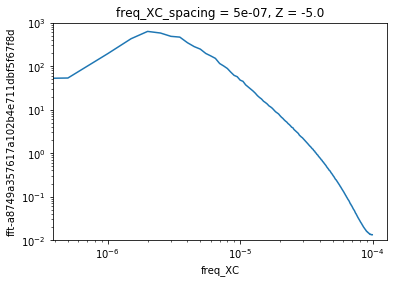

In [15]:
fig, ax = plt.subplots()
pow_spec[0].plot(ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-2,1e3])

In [72]:
from dask.dot import dot_graph

RuntimeError: Drawing dask graphs requires the `graphviz` python library and the `graphviz` system library to be installed.